# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [35]:
!pip install nba_api
import nba_api
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
  from nba_api.stats.endpoints import commonallplayers
  common_all_players = commonallplayers.CommonAllPlayers(
      is_only_current_season = 1,
      league_id = '00',
      season = '2021-22'
  )
  df = common_all_players.common_all_players.get_data_frame() 
  df = df[(df.TEAM_ID != 0) & (df.GAMES_PLAYED_FLAG != 'N') & (df.PERSON_ID != 1630597) & (df.PERSON_ID != 1630492)]
  df = df[['PERSON_ID','DISPLAY_FIRST_LAST','TEAM_NAME']]

  return df

print(get_and_save_players_list())

     PERSON_ID DISPLAY_FIRST_LAST  TEAM_NAME
0      1630173   Precious Achiuwa    Raptors
1       203500       Steven Adams  Grizzlies
2      1628389        Bam Adebayo       Heat
3      1630583       Santi Aldama  Grizzlies
4       200746  LaMarcus Aldridge       Nets
..         ...                ...        ...
612    1628221          Gabe York     Pacers
613     201152     Thaddeus Young    Raptors
614    1629027         Trae Young      Hawks
615    1630209     Omer Yurtseven       Heat
617    1627826        Ivica Zubac   Clippers

[503 rows x 3 columns]


In [3]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [4]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
  from nba_api.stats.endpoints import commonplayerinfo
  import time
  player_p_info_df = pd.DataFrame()
  for index, player_info in current_players_list.iterrows():
      player_p_info        = commonplayerinfo.CommonPlayerInfo(player_id=player_info.PERSON_ID)
      player_p_info_df_tmp = player_p_info.common_player_info.get_data_frame()
      columns_to_save  = ['PERSON_ID', 'DISPLAY_FIRST_LAST', 'TEAM_NAME', 'POSITION', 'HEIGHT', 'WEIGHT', 'COUNTRY', 'BIRTHDATE', 'SEASON_EXP', 'DRAFT_NUMBER']
      player_p_info_df_tmp = player_p_info_df_tmp[columns_to_save]
      player_p_info_df = pd.concat([player_p_info_df,player_p_info_df_tmp], axis=0)
      time.sleep(0.5)

  player_p_info_df = player_p_info_df.rename(columns={'PERSON_ID': 'PLAYER_ID'} )

  return player_p_info_df
        
print(get_players_personal_information(current_players_list))

    PLAYER_ID DISPLAY_FIRST_LAST  TEAM_NAME        POSITION HEIGHT WEIGHT  \
0     1630173   Precious Achiuwa    Raptors         Forward    6-8    225   
0      203500       Steven Adams  Grizzlies          Center   6-11    265   
0     1628389        Bam Adebayo       Heat  Center-Forward    6-9    255   
0     1630583       Santi Aldama  Grizzlies  Forward-Center   6-11    215   
0      200746  LaMarcus Aldridge       Nets  Center-Forward   6-11    250   
..        ...                ...        ...             ...    ...    ...   
0     1628221          Gabe York     Pacers           Guard    6-3    190   
0      201152     Thaddeus Young    Raptors         Forward    6-8    235   
0     1629027         Trae Young      Hawks           Guard    6-1    164   
0     1630209     Omer Yurtseven       Heat          Center   6-11    275   
0     1627826        Ivica Zubac   Clippers          Center    7-0    240   

        COUNTRY            BIRTHDATE  SEASON_EXP DRAFT_NUMBER  
0       Nig

In [5]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [6]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
  from nba_api.stats.endpoints import playercareerstats
  import time
  player_p_stats_df = pd.DataFrame()
  for index, player_info in current_players_list.iterrows():
    player_career_stats = playercareerstats.PlayerCareerStats(per_mode36 = "PerGame", player_id = player_info.PERSON_ID)
    players_career_stats_df_tmp =  player_career_stats.career_totals_regular_season.get_data_frame()
    columns_to_save_1 = ['PLAYER_ID','GP','MIN','PTS','REB','AST','STL','BLK']
    players_career_stats_df_tmp = players_career_stats_df_tmp[columns_to_save_1]
    player_p_stats_df = pd.concat([player_p_stats_df, players_career_stats_df_tmp], axis=0)
    time.sleep(0.5)

  return player_p_stats_df

print(get_players_career_stats(current_players_list))

    PLAYER_ID    GP   MIN   PTS  REB  AST  STL  BLK
0     1630173   134  18.4   7.2  5.1  0.8  0.4  0.5
0      203500   664  26.8   9.3  8.0  1.5  0.9  0.9
0     1628389   343  28.2  13.5  8.3  3.5  1.0  0.9
0     1630583    32  11.2   4.1  2.7  0.7  0.2  0.3
0      200746  1076  33.7  19.1  8.1  1.9  0.7  1.1
..        ...   ...   ...   ...  ...  ...  ...  ...
0     1628221     2  10.7   4.0  1.0  2.0  1.0  0.5
0      201152  1085  29.3  12.8  5.8  1.8  1.4  0.4
0     1629027   280  33.6  25.3  3.9  9.1  0.9  0.2
0     1630209    56  12.6   5.3  5.3  0.9  0.3  0.4
0     1627826   360  19.0   8.3  6.5  1.1  0.3  0.8

[503 rows x 8 columns]


In [7]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [8]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):
  from nba_api.stats.endpoints import playerprofilev2
  import time
  player_p_nextgame_df = pd.DataFrame()
  count = 0
  for index, player_info in current_players_list.iterrows():
    player_next_game = playerprofilev2.PlayerProfileV2(per_mode36 = "PerGame", player_id = player_info.PERSON_ID) 
    time.sleep(0.5)

    players_nextgame_df_tmp =  player_next_game.next_game.get_data_frame()
    players_nextgame_id_df_tmp = player_next_game.career_totals_regular_season.get_data_frame()

    players_nextgame_df_tmp = players_nextgame_df_tmp["GAME_DATE"]
    players_nextgame_id_df_tmp = players_nextgame_id_df_tmp["PLAYER_ID"]

    players_nextgame_and_id_tmp = pd.DataFrame()
    player_nextgame_and_id_tmp = pd.concat([players_nextgame_df_tmp, players_nextgame_id_df_tmp ], axis=1, ignore_index = True)

    player_p_nextgame_df = pd.concat([player_p_nextgame_df, player_nextgame_and_id_tmp], axis=0)
    count = count + 1
    time.sleep(0.5)


  player_p_nextgame_df = player_p_nextgame_df.rename(columns={0: 'GAME_DATE', 1: 'PLAYER_ID'})

  return player_p_nextgame_df

print(get_players_next_game(current_players_list))

      GAME_DATE  PLAYER_ID
0           NaN    1630173
0   MAY 03 2022     203500
0   MAY 04 2022    1628389
0   MAY 03 2022    1630583
0           NaN     200746
..          ...        ...
0           NaN    1628221
0           NaN     201152
0           NaN    1629027
0   MAY 04 2022    1630209
0           NaN    1627826

[503 rows x 2 columns]


In [9]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [11]:
players_contracts = pd.read_csv("players_contracts.csv")
del players_contracts["Unnamed: 0"]
players_contracts = players_contracts.rename(columns={'Salary': 'SALARY'})

In [12]:
!pip install unidecode
import unidecode

     |████████████████████████████████| 235 kB 14.8 MB/s 


In [13]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(players_contracts):    
  players_waste = players_contracts['Players'].str.split('\\', expand=True)
  players_waste.columns = ["PLAYERS", "waste"]
  players_contracts = pd.concat([players_contracts, players_waste], axis=1)
  del players_contracts["Players"]
  del players_contracts["waste"]
  players_contracts = players_contracts[["PLAYERS","SALARY"]]
  players_contracts["PLAYERS"] = players_contracts["PLAYERS"].astype(str)
  players_contracts["PLAYERS"] = players_contracts["PLAYERS"].apply(unidecode.unidecode)
  players_contracts["PLAYERS"] = players_contracts["PLAYERS"].str.strip()
  players_contracts = players_contracts.drop_duplicates(subset=["PLAYERS"],keep='first') 

  players_contracts_playersid = pd.DataFrame(columns=["PLAYER_ID","SALARY"])
  count = 0
  for index, columns in current_players_list.iterrows():
    players_contracts_playersid.loc[count,"PLAYER_ID"] = columns["PERSON_ID"]
    mask = players_contracts["PLAYERS"] == columns['DISPLAY_FIRST_LAST']
    salary = (list(players_contracts.SALARY[mask]))
    if len(salary):
      salary_def = salary[0]
    else:
      salary_def = pd.NA
    players_contracts_playersid.loc[count,"SALARY"] = salary_def
    count = count + 1
  
  return players_contracts_playersid 

print(get_nba_players_salaries(players_contracts))

    PLAYER_ID     SALARY
0     1630173   $2711280
1      203500  $17073171
2     1628389  $28103550
3     1630583   $1994520
4      200746   $2641691
..        ...        ...
498   1628221       <NA>
499    201152  $14190000
500   1629027   $8326471
501   1630209   $1489065
502   1627826   $7518518

[503 rows x 2 columns]


In [14]:
players_salaries = get_nba_players_salaries(players_contracts)
players_salaries.to_csv("nba_players_salary.csv")

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [17]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
  if (len(players_personal_info) == len(players_career_stats)) & (len(players_career_stats)==len(players_next_game)) & (len(players_next_game)==len(players_salaries)):
    df_merge_tmp = pd.merge(players_personal_info, players_career_stats,  on='PLAYER_ID')
    df_merge_tmp_0 = pd.merge(df_merge_tmp, players_next_game, on='PLAYER_ID')
    df_merge = pd.merge(df_merge_tmp_0, players_salaries, on="PLAYER_ID")
    df_merge = df_merge.rename(columns={"DISPLAY_FIRST_LAST": 'PLAYER_NAME'})

  return df_merge

print(merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries))

    PLAYER_ID        PLAYER_NAME  TEAM_NAME        POSITION HEIGHT WEIGHT  \
0     1630173   Precious Achiuwa    Raptors         Forward    6-8    225   
1      203500       Steven Adams  Grizzlies          Center   6-11    265   
2     1628389        Bam Adebayo       Heat  Center-Forward    6-9    255   
3     1630583       Santi Aldama  Grizzlies  Forward-Center   6-11    215   
4      200746  LaMarcus Aldridge       Nets  Center-Forward   6-11    250   
..        ...                ...        ...             ...    ...    ...   
498   1628221          Gabe York     Pacers           Guard    6-3    190   
499    201152     Thaddeus Young    Raptors         Forward    6-8    235   
500   1629027         Trae Young      Hawks           Guard    6-1    164   
501   1630209     Omer Yurtseven       Heat          Center   6-11    275   
502   1627826        Ivica Zubac   Clippers          Center    7-0    240   

         COUNTRY            BIRTHDATE  SEASON_EXP DRAFT_NUMBER    GP   MIN 

In [18]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [38]:
players_dataset = pd.read_csv("raw_nba_players_dataset.csv")

In [39]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
  players_dataset = players_dataset[players_dataset['SALARY'].notna()]
  players_dataset = players_dataset[players_dataset['TEAM_NAME'].notna()]

  return players_dataset

In [40]:
working_df = copy_and_delete_nan(players_dataset)

In [41]:
del working_df["Unnamed: 0"]
working_df

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
0,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,NaN,$2711280
1,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,MAY 03 2022,$17073171
2,1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,MAY 04 2022,$28103550
3,1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,MAY 03 2022,$1994520
4,200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,NaN,$2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26T00:00:00,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,NaN,$8526316
499,201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,NaN,$14190000
500,1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,NaN,$8326471
501,1630209,Omer Yurtseven,Heat,Center,6-11,275,Turkey,1998-06-19T00:00:00,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,MAY 04 2022,$1489065


2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [42]:
### Complete in this cell: cast all columns to its type

def cast_columns(working_df):
#Problem1 -'$' 
  salary_waste = working_df['SALARY'].str.split('$', expand=True)
  salary_waste.columns = ["waste", "SALARY_DEF"]
  working_df = pd.concat([working_df, salary_waste], axis=1)
  del working_df["SALARY"]
  del working_df["waste"]
  working_df = working_df.rename(columns={"SALARY_DEF": 'SALARY'})

#Problem2 - Months on Date_Game are not in numbers..
  m_d_y = working_df['GAME_DATE'].str.split(' ', expand=True)
  m_d_y.columns = ["m", "d", "y"]
  working_df = pd.concat([working_df, m_d_y], axis=1)
  del working_df["GAME_DATE"]


  playersid_month = pd.DataFrame(columns=["PLAYER_ID","MONTH"])
  count = 0
  for index, columns in working_df.iterrows():
    playersid_month.loc[count, "PLAYER_ID"] = columns["PLAYER_ID"]
    if columns["m"] == "JAN":
      playersid_month.loc[count, "MONTH"] = "01"
    elif columns["m"] == "FEB":
      playersid_month.loc[count, "MONTH"] = "02"
    elif columns["m"] == "MAR":
      playersid_month.loc[count, "MONTH"] = "03"
    elif columns["m"] == "APR":
      playersid_month.loc[count, "MONTH"] = "04"
    elif columns["m"] == "MAY":
      playersid_month.loc[count, "MONTH"] = "05"
    elif columns["m"] == "JUN":
      playersid_month.loc[count, "MONTH"] = "06"
    elif columns["m"] == "JUL":
      playersid_month.loc[count, "MONTH"] = "07"
    elif columns["m"] == "AUG":
      playersid_month.loc[count, "MONTH"] = "08"
    elif columns["m"] == "SEP":
      playersid_month.loc[count, "MONTH"] = "09"
    elif columns["m"] == "OCT":
      playersid_month.loc[count, "MONTH"] = "10"
    elif columns["m"] == "NOV":
      playersid_month.loc[count, "MONTH"] = "11"
    elif columns["m"] == "DEC":
      playersid_month.loc[count, "MONTH"] = "12"

    count = count + 1

  wdf_merge = pd.merge(working_df, playersid_month, on="PLAYER_ID")
  wdf_merge["GAME_DATE"] = wdf_merge.MONTH + "/" + wdf_merge.d + "/" + wdf_merge.y
  del wdf_merge["m"]
  del wdf_merge["d"]
  del wdf_merge["y"]
  del wdf_merge["MONTH"]

  working_df = wdf_merge

#Problem3 - time data '1999-09-19T00:00:00' does not match format '%m/%d/%Y', I must clean this and change "-" for "/"
  m1_d1_y1 = working_df['BIRTHDATE'].str.split('-', expand=True)
  m1_d1_y1.columns = ["m1", "d1", "y1_tmp"]
  working_df = pd.concat([working_df, m1_d1_y1], axis=1)
  y1_tmp_waste = working_df["y1_tmp"].str.split("T", expand=True)
  y1_tmp_waste.columns = ["y1","waste"]
  working_df = pd.concat([working_df, y1_tmp_waste], axis=1)
  del working_df["y1_tmp"]
  del working_df["waste"]
  del working_df["BIRTHDATE"]
  working_df["BIRTHDATE"] = working_df.d1 + "/" + working_df.y1 + "/" + working_df.m1
  del working_df["m1"]
  del working_df["d1"]
  del working_df["y1"]

#Now I can make the data type transformation
  working_df["SALARY"] = working_df["SALARY"].astype(int)
  working_df['GAME_DATE'] = pd.to_datetime(working_df['GAME_DATE'], format="%m/%d/%Y" )
  working_df['BIRTHDATE'] = pd.to_datetime(working_df['BIRTHDATE'], format="%m/%d/%Y" )

  return working_df

In [43]:
working_df = cast_columns(working_df)

In [44]:
working_df

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE
0,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaT,1999-09-19
1,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20
2,1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18
3,1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10
4,200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaT,1985-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,Guard,6-5,185,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaT,1992-04-26
442,201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaT,1988-06-21
443,1629027,Trae Young,Hawks,Guard,6-1,164,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaT,1998-09-19
444,1630209,Omer Yurtseven,Heat,Center,6-11,275,Turkey,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19


In [45]:
working_df.dtypes

PLAYER_ID               object
PLAYER_NAME             object
TEAM_NAME               object
POSITION                object
HEIGHT                  object
WEIGHT                   int64
COUNTRY                 object
SEASON_EXP               int64
DRAFT_NUMBER            object
GP                       int64
MIN                    float64
PTS                    float64
REB                    float64
AST                    float64
STL                    float64
BLK                    float64
SALARY                   int64
GAME_DATE       datetime64[ns]
BIRTHDATE       datetime64[ns]
dtype: object

3- Create a function that converts the height column from height in feet and inches to centimeters

In [46]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
  feet_inches = working_df['HEIGHT'].str.split('-', expand=True)
  feet_inches.columns = ["feet", "inches"]
  working_df = pd.concat([working_df, feet_inches], axis=1)
  del working_df["HEIGHT"]
  working_df['feet'] = working_df['feet'].astype(int)
  working_df['inches'] = working_df['inches'].astype(int)
  working_df["HEIGHT"] = working_df.feet*30.48 + working_df.inches*2.54
  working_df['HEIGHT'] = working_df['HEIGHT'].astype(int)
  del working_df['feet']
  del working_df['inches']
  
  return working_df

In [47]:
working_df = convert_height_column(working_df)
working_df

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,WEIGHT,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT
0,1630173,Precious Achiuwa,Raptors,Forward,225,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaT,1999-09-19,203
1,203500,Steven Adams,Grizzlies,Center,265,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210
2,1628389,Bam Adebayo,Heat,Center-Forward,255,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205
3,1630583,Santi Aldama,Grizzlies,Forward-Center,215,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210
4,200746,LaMarcus Aldridge,Nets,Center-Forward,250,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaT,1985-07-19,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,Guard,185,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaT,1992-04-26,195
442,201152,Thaddeus Young,Raptors,Forward,235,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaT,1988-06-21,203
443,1629027,Trae Young,Hawks,Guard,164,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaT,1998-09-19,185
444,1630209,Omer Yurtseven,Heat,Center,275,Turkey,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210


4- Create a function that converts the weight column from pounds to kilograms

In [48]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
  working_df["WEIGHT_TMP"]= working_df.WEIGHT//2.20462
  del working_df["WEIGHT"]
  working_df = working_df.rename(columns={"WEIGHT_TMP": 'WEIGHT'})

  return working_df

In [49]:
working_df = convert_weight_column(working_df)
working_df

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT,WEIGHT
0,1630173,Precious Achiuwa,Raptors,Forward,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaT,1999-09-19,203,102.0
1,203500,Steven Adams,Grizzlies,Center,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210,120.0
2,1628389,Bam Adebayo,Heat,Center-Forward,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205,115.0
3,1630583,Santi Aldama,Grizzlies,Forward-Center,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210,97.0
4,200746,LaMarcus Aldridge,Nets,Center-Forward,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaT,1985-07-19,210,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,Guard,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaT,1992-04-26,195,83.0
442,201152,Thaddeus Young,Raptors,Forward,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaT,1988-06-21,203,106.0
443,1629027,Trae Young,Hawks,Guard,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaT,1998-09-19,185,74.0
444,1630209,Omer Yurtseven,Heat,Center,Turkey,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210,124.0


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [50]:
### Complete in this cell: add age column

def add_age_column(working_df):
  working_df["TIME ALIVE"] = pd.to_datetime('today') - working_df.BIRTHDATE
  working_df["TIME ALIVE"] = working_df["TIME ALIVE"].astype(str)
  days_waste = working_df['TIME ALIVE'].str.split(' d', expand=True)
  days_waste.columns = ["days_alive", "waste"]
  working_df = pd.concat([working_df, days_waste], axis=1)
  working_df["days_alive"] = working_df["days_alive"].astype(int)
  del working_df["TIME ALIVE"]
  del working_df["waste"]
  working_df["YEARS"]= working_df.days_alive // 365
  working_df["RESTO"]= working_df.days_alive % 365
  working_df["TODAY"]= pd.to_datetime('today')
  working_df['is_leap_year'] = working_df['TODAY'].dt.is_leap_year

  """
  Now the problem reduces into converting the rest into an "x" amount of month and days.
  OBS: ((E,31),(F,28 O 29),(M,31),(A,30),(M,31),(J,30),(J,31),(A,31),(S,30),(O,31),(N,30),(D,31))
  OBS(I): Feb varies depending on if it is or not a leap year
  OBS(II): A leap year has 366 days...
  """
    
  playersid_months_days = pd.DataFrame(columns=["PLAYER_ID","MONTH","DAYS"])
  count = 0
  for index, columns in working_df.iterrows():
    playersid_months_days.loc[count, "PLAYER_ID"] = columns["PLAYER_ID"]
    if columns['is_leap_year'] == False:
      if (columns["RESTO"] > 0)  & (columns["RESTO"] <= 31) :
        playersid_months_days.loc[count, "MONTH"] = 1     #E
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"]
      elif (columns["RESTO"] > 31)  & (columns["RESTO"] <= 59) :
        playersid_months_days.loc[count, "MONTH"] = 2     #F
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 31
      elif (columns["RESTO"] > 59)  & (columns["RESTO"] <= 90) :
        playersid_months_days.loc[count, "MONTH"] = 3     #M
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 59
      elif (columns["RESTO"] > 90)  & (columns["RESTO"] <= 120) :
        playersid_months_days.loc[count, "MONTH"] = 4     #A
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 90 
      elif (columns["RESTO"] > 120)  & (columns["RESTO"] <= 151) :
        playersid_months_days.loc[count, "MONTH"] = 5     #M
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 120
      elif (columns["RESTO"] > 151)  & (columns["RESTO"] <= 181) :
        playersid_months_days.loc[count, "MONTH"] = 6     #J
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 151
      elif (columns["RESTO"] > 181)  & (columns["RESTO"] <= 212) :
        playersid_months_days.loc[count, "MONTH"] = 7     #J
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 181
      elif (columns["RESTO"] > 212)  & (columns["RESTO"] <= 243) :
        playersid_months_days.loc[count, "MONTH"] = 8     #A
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 212
      elif (columns["RESTO"] > 243)  & (columns["RESTO"] <= 273) :
        playersid_months_days.loc[count, "MONTH"] = 9     #S
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 243
      elif (columns["RESTO"] > 273)  & (columns["RESTO"] <= 304) :
        playersid_months_days.loc[count, "MONTH"] = 10    #O
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 273
      elif (columns["RESTO"] > 304)  & (columns["RESTO"] <= 334) :
        playersid_months_days.loc[count, "MONTH"] = 11    #N
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 304
      elif (columns["RESTO"] > 334)  & (columns["RESTO"] <= 365) :
        playersid_months_days.loc[count, "MONTH"] = 12    #D
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 334

    else:
      if (columns["RESTO"] > 0)  & (columns["RESTO"] <= 31) :
        playersid_months_days.loc[count, "MONTH"] = 1     #E
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"]
      elif (columns["RESTO"] > 31)  & (columns["RESTO"] <= 60) :
        playersid_months_days.loc[count, "MONTH"] = 2     #F
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 31
      elif (columns["RESTO"] > 60)  & (columns["RESTO"] <= 91) :
        playersid_months_days.loc[count, "MONTH"] = 3     #M
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 60
      elif (columns["RESTO"] > 91)  & (columns["RESTO"] <= 121) :
        playersid_months_days.loc[count, "MONTH"] = 4     #A
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 91
      elif (columns["RESTO"] > 121)  & (columns["RESTO"] <= 152) :
        playersid_months_days.loc[count, "MONTH"] = 5     #M
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 121
      elif (columns["RESTO"] > 152)  & (columns["RESTO"] <= 182) :
        playersid_months_days.loc[count, "MONTH"] = 6     #J
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 152
      elif (columns["RESTO"] > 182)  & (columns["RESTO"] <= 213) :
        playersid_months_days.loc[count, "MONTH"] = 7     #J
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 182
      elif (columns["RESTO"] > 213)  & (columns["RESTO"] <= 244) :
        playersid_months_days.loc[count, "MONTH"] = 8     #A
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 213
      elif (columns["RESTO"] > 244)  & (columns["RESTO"] <= 274) :
        playersid_months_days.loc[count, "MONTH"] = 9     #S
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 244
      elif (columns["RESTO"] > 274)  & (columns["RESTO"] <= 305) :
        playersid_months_days.loc[count, "MONTH"] = 10    #O
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 274
      elif (columns["RESTO"] > 305)  & (columns["RESTO"] <= 335) :
        playersid_months_days.loc[count, "MONTH"] = 11    #N
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 305
      elif (columns["RESTO"] > 335)  & (columns["RESTO"] <= 366) :
        playersid_months_days.loc[count, "MONTH"] = 12    #D
        playersid_months_days.loc[count, "DAYS"]  = columns["RESTO"] - 335
        
    count = count + 1

  working_df = pd.merge(working_df, playersid_months_days, on="PLAYER_ID")
    
  del working_df["days_alive"]
  del working_df["is_leap_year"]
  del working_df["TODAY"]
  del working_df["RESTO"]
    
  working_df["YEARS"] = working_df["YEARS"].astype(str)
  working_df["MONTH"] = working_df["MONTH"].astype(str)
  working_df["DAYS"] = working_df["DAYS"].astype(str)

  working_df["AGE"] = "Years"+"="+working_df.YEARS+","+"Months"+"="+ working_df.MONTH+","+"Days"+"="+working_df.DAYS

  del working_df["YEARS"]
  del working_df["MONTH"]
  del working_df["DAYS"]

  return working_df

In [51]:
working_df = add_age_column(working_df)
working_df

PLAYER_ID               object
PLAYER_NAME             object
TEAM_NAME               object
POSITION                object
COUNTRY                 object
SEASON_EXP               int64
DRAFT_NUMBER            object
GP                       int64
MIN                    float64
PTS                    float64
REB                    float64
AST                    float64
STL                    float64
BLK                    float64
SALARY                   int64
GAME_DATE       datetime64[ns]
BIRTHDATE       datetime64[ns]
HEIGHT                   int64
WEIGHT                 float64
AGE                     object
dtype: object


,PLAYER_ID,PLAYER_NAME,TEAM_NAME,POSITION,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT,WEIGHT,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaT,1999-09-19,203,102.0,"Years=22,Months=8,Days=20"
1,203500,Steven Adams,Grizzlies,Center,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210,120.0,"Years=28,Months=10,Days=21"
2,1628389,Bam Adebayo,Heat,Center-Forward,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205,115.0,"Years=24,Months=10,Days=22"
3,1630583,Santi Aldama,Grizzlies,Forward-Center,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210,97.0,"Years=21,Months=4,Days=28"
4,200746,LaMarcus Aldridge,Nets,Center-Forward,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaT,1985-07-19,210,113.0,"Years=36,Months=10,Days=24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,Guard,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaT,1992-04-26,195,83.0,"Years=30,Months=1,Days=14"
442,201152,Thaddeus Young,Raptors,Forward,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaT,1988-06-21,203,106.0,"Years=33,Months=11,Days=20"
443,1629027,Trae Young,Hawks,Guard,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaT,1998-09-19,185,74.0,"Years=23,Months=8,Days=20"
444,1630209,Omer Yurtseven,Heat,Center,Turkey,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210,124.0,"Years=23,Months=11,Days=20"


6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [52]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):
  first_second = working_df['POSITION'].str.split('-', expand=True)
  first_second.columns = ["first", "second"]
  working_df = pd.concat([working_df, first_second], axis=1)
  del working_df["POSITION"]
  del working_df["second"]
  working_df = working_df.rename(columns={"first": 'POSITION'})

  return working_df

In [53]:
working_df = update_position(working_df)
working_df

,PLAYER_ID,PLAYER_NAME,TEAM_NAME,COUNTRY,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,GAME_DATE,BIRTHDATE,HEIGHT,WEIGHT,AGE,POSITION
0,1630173,Precious Achiuwa,Raptors,Nigeria,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2711280,NaT,1999-09-19,203,102.0,"Years=22,Months=8,Days=20",Forward
1,203500,Steven Adams,Grizzlies,New Zealand,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,17073171,2022-05-03,1993-07-20,210,120.0,"Years=28,Months=10,Days=21",Center
2,1628389,Bam Adebayo,Heat,USA,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,28103550,2022-05-04,1997-07-18,205,115.0,"Years=24,Months=10,Days=22",Center
3,1630583,Santi Aldama,Grizzlies,Spain,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,1994520,2022-05-03,2001-01-10,210,97.0,"Years=21,Months=4,Days=28",Forward
4,200746,LaMarcus Aldridge,Nets,USA,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2641691,NaT,1985-07-19,210,113.0,"Years=36,Months=10,Days=24",Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,1626153,Delon Wright,Hawks,USA,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,8526316,NaT,1992-04-26,195,83.0,"Years=30,Months=1,Days=14",Guard
442,201152,Thaddeus Young,Raptors,USA,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,14190000,NaT,1988-06-21,203,106.0,"Years=33,Months=11,Days=20",Forward
443,1629027,Trae Young,Hawks,USA,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,8326471,NaT,1998-09-19,185,74.0,"Years=23,Months=8,Days=20",Guard
444,1630209,Omer Yurtseven,Heat,Turkey,0,Undrafted,56,12.6,5.3,5.3,0.9,0.3,0.4,1489065,2022-05-04,1998-06-19,210,124.0,"Years=23,Months=11,Days=20",Center


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [54]:
#Problem1- I have to convert "DRAFT_NUMBER" column into integrers
counts = 0
for index, columns in working_df.iterrows():
  if columns["DRAFT_NUMBER"] == "Undrafted":
    working_df.loc[counts, "DRAFT_NUMBER"] = -1
  counts = counts + 1

working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].fillna(0)
working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].astype(int)

#Problem2- Indexing everything on the Player ID
working_df.set_index('PLAYER_ID', inplace = True)

working_df.dtypes

PLAYER_NAME             object
TEAM_NAME               object
COUNTRY                 object
SEASON_EXP               int64
DRAFT_NUMBER             int64
GP                       int64
MIN                    float64
PTS                    float64
REB                    float64
AST                    float64
STL                    float64
BLK                    float64
SALARY                   int64
GAME_DATE       datetime64[ns]
BIRTHDATE       datetime64[ns]
HEIGHT                   int64
WEIGHT                 float64
AGE                     object
POSITION                object
dtype: object

In [55]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [56]:
nba_dataset = pd.read_csv("nba_players_processed_dataset.csv")
nba_dataset["BIRTHDATE"] = pd.to_datetime(nba_dataset["BIRTHDATE"])
nba_dataset["GAME_DATE"] = pd.to_datetime(nba_dataset["GAME_DATE"])
nba_dataset.dtypes

PLAYER_ID                int64
PLAYER_NAME             object
TEAM_NAME               object
COUNTRY                 object
SEASON_EXP               int64
DRAFT_NUMBER             int64
GP                       int64
MIN                    float64
PTS                    float64
REB                    float64
AST                    float64
STL                    float64
BLK                    float64
SALARY                   int64
GAME_DATE       datetime64[ns]
BIRTHDATE       datetime64[ns]
HEIGHT                   int64
WEIGHT                 float64
AGE                     object
POSITION                object
dtype: object

In [57]:
### Complete in this cell: print general metrics

#1-Total number of players
total_players = len(nba_dataset)
print("The amount of players is",total_players)

#2-Number of USA and foreign born players 
usa = 0
foreign = 0
for index, columns in nba_dataset.iterrows():
  if columns["COUNTRY"] == "USA":
    usa = usa + 1
  else:
    foreign = foreign + 1

if (usa + foreign) == len(nba_dataset):
  print("The number of USA born players are",usa)
  print("The number of foreign born players are",foreign)

#3-Number of players per position
center = 0
guard = 0
forward = 0
for index, columns in nba_dataset.iterrows():
  if columns["POSITION"] == "Center":
    center = center + 1
  elif columns["POSITION"] == "Guard":
    guard = guard + 1
  else: 
    forward = forward + 1

if (center + guard + forward) == len(nba_dataset):
  print("The number of Centers on the league are", center)
  print("The number of Guards on the league are", guard)
  print("The number of Forwards on the league are", forward)


#4-Number of players per team 
teamplayer_counts = dict()
for index, columns in nba_dataset.iterrows():
  if columns["TEAM_NAME"] not in teamplayer_counts:
      teamplayer_counts[columns["TEAM_NAME"]] = 1
  else:
      teamplayer_counts[columns["TEAM_NAME"]] = teamplayer_counts[columns["TEAM_NAME"]] + 1

#OBS: Dictionaries are not iterables, I could tranform each value into a tuple put them in a list and iterate it...
team_players = list()
for key, val in teamplayer_counts.items():
    newtup = (val, key)
    team_players.append(newtup)

for i in range(len(team_players)):
  print("The number of players of",team_players[i][1],"is",team_players[i][0])
  
#5-Number of rookies
rookie = 0
for index, columns in nba_dataset.iterrows():
  if columns["SEASON_EXP"] == 1:
    rookie = rookie + 1

print("The number of rookies are",rookie)

The amount of players is 446
The number of USA born players are 338
The number of foreign born players are 108
The number of Centers on the league are 59
The number of Guards on the league are 212
The number of Forwards on the league are 175
The number of players of Raptors is 15
The number of players of Grizzlies is 15
The number of players of Heat is 15
The number of players of Nets is 15
The number of players of Jazz is 15
The number of players of Bucks is 14
The number of players of Cavaliers is 16
The number of players of Pelicans is 16
The number of players of Lakers is 15
The number of players of Magic is 15
The number of players of Bulls is 16
The number of players of Wizards is 15
The number of players of Suns is 15
The number of players of Pistons is 14
The number of players of Hornets is 15
The number of players of Kings is 15
The number of players of Knicks is 14
The number of players of Nuggets is 14
The number of players of 76ers is 15
The number of players of Spurs is 16

In [58]:
### Complete in this cell: print players descriptions

#1-- Average player age (in years)
nba_dataset["TIME ALIVE"] = pd.to_datetime('today') - nba_dataset.BIRTHDATE
nba_dataset["TIME ALIVE"] = nba_dataset["TIME ALIVE"].astype(str)
days_waste = nba_dataset['TIME ALIVE'].str.split(' d', expand=True)
days_waste.columns = ["days_alive", "waste"]
nba_dataset = pd.concat([nba_dataset, days_waste], axis=1)
nba_dataset["days_alive"] = nba_dataset["days_alive"].astype(int)
del nba_dataset["TIME ALIVE"]
del nba_dataset["waste"]
total_days = nba_dataset['days_alive'].sum()
total_days_mean = total_days/len(nba_dataset)
mean = total_days_mean // 365
print("The average player age in years is",mean)

#2-Youngest player age (years and days, i.e: 18 years and 16 days)
mins = nba_dataset["days_alive"].min()
years = mins//365
days = mins % 365
print("The youngest player on the NBA has",years,"years","and",days,"days")

#3-Oldest player age (years and days, i.e: 40 years and 160 days)
max = nba_dataset["days_alive"].max()
years1 = max//365
days1 = max % 365
print("The oldest player on the NBA has",years1,"years","and",days1,"days")

#4-Min and Max players height
mins1 = nba_dataset["HEIGHT"].min()
print("The shortest player on the NBA is",mins1,"cm")

max1 = nba_dataset["HEIGHT"].max()
print("The tallest player on the NBA is",max1,"cm")

#5- Average height of players per position
sum_guards = 0
sum_forwards = 0
sum_centers = 0
for index, columns in nba_dataset.iterrows():
  if columns["POSITION"] == "Guard":
    sum_guards = sum_guards + columns["HEIGHT"]
  elif columns["POSITION"] == "Center":
    sum_centers = sum_centers + columns["HEIGHT"]
  else:
    sum_forwards = sum_forwards + columns["HEIGHT"]

print("The average height of the Guards is",(sum_guards//guard),"cm")
print("The average height of the Centers is",(sum_centers//center),"cm")
print("The average height of the Guards is",(sum_forwards//forward),"cm")    

The average player age in years is 26.0
The youngest player on the NBA has 19 years and 135 days
The oldest player on the NBA has 41 years and 338 days
The shortest player on the NBA is 175 cm
The tallest player on the NBA is 220 cm
The average height of the Guards is 192 cm
The average height of the Centers is 210 cm
The average height of the Guards is 202 cm


In [59]:
### Complete in this cell: Contracts

min_salary = nba_dataset["SALARY"].min()
max_salary = nba_dataset["SALARY"].max()
print("The highest contract on the NBA is of $",max_salary,"USD")
print("The lowest contract on the NBA is of $",min_salary,"USD")

mean_salary = np.mean(nba_dataset["SALARY"])
print("Mean: ", int(mean_salary))
median_salary = np.median(nba_dataset["SALARY"])
print("Median: ", int(median_salary))

The highest contract on the NBA is of $ 45780966 USD
The lowest contract on the NBA is of $ 5318 USD
Mean:  8728325
Median:  4405080


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

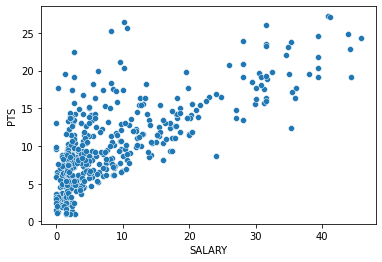

In [61]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.scatterplot(data=nba_dataset, x=nba_dataset['SALARY']/1000000, y=nba_dataset['PTS'])
plt.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

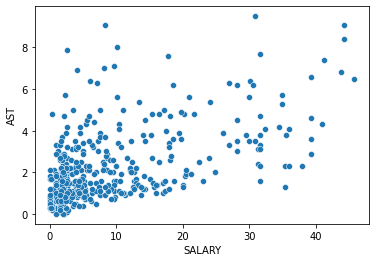

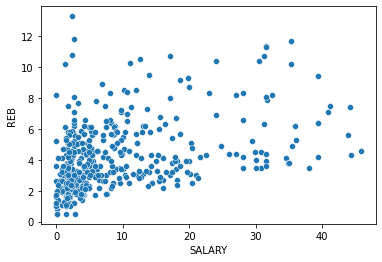

In [62]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
sns.scatterplot(data=nba_dataset, x=nba_dataset['SALARY']/1000000, y=nba_dataset['AST'])
plt.show()

sns.scatterplot(data=nba_dataset, x=nba_dataset['SALARY']/1000000, y=nba_dataset['REB'])
plt.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

In [63]:
### Complete in this cell: non rookie contracts
non_rookie_dataset = pd.DataFrame(["PLAYER_ID","POINTS","ASSISTS","REBOUNDS","SALARY"])
count = 0
for index, columns in nba_dataset.iterrows():
  if columns["SEASON_EXP"] > 4:
    non_rookie_dataset.loc[count,"PlAYER_NAME"] = columns["PLAYER_NAME"]
    non_rookie_dataset.loc[count,"POINTS"] = columns["PTS"]
    non_rookie_dataset.loc[count,"ASSISTS"] = columns["AST"]
    non_rookie_dataset.loc[count,"REBOUNDS"] = columns["REB"]
    non_rookie_dataset.loc[count,"SALARY"] = columns["SALARY"]
  count = count + 1

del non_rookie_dataset[0]
non_rookie_dataset = non_rookie_dataset[non_rookie_dataset['SALARY'].notna()]
non_rookie_dataset

,PlAYER_NAME,POINTS,ASSISTS,REBOUNDS,SALARY
1,Steven Adams,9.3,1.5,8.0,17073171.0
4,LaMarcus Aldridge,19.1,1.9,8.1,2641691.0
9,Kyle Anderson,6.7,2.3,4.4,9937150.0
10,Giannis Antetokounmpo,21.8,4.6,9.4,39344970.0
12,Carmelo Anthony,22.5,2.7,6.2,2641691.0
...,...,...,...,...,...
437,Justise Winslow,8.4,2.5,5.1,3902439.0
439,Christian Wood,14.2,1.3,7.3,13666667.0
441,Delon Wright,7.2,3.0,3.2,8526316.0
442,Thaddeus Young,12.8,1.8,5.8,14190000.0


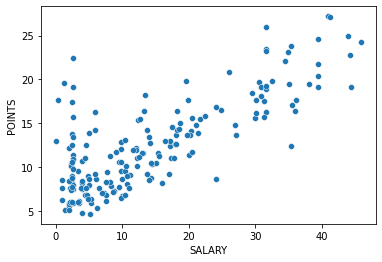

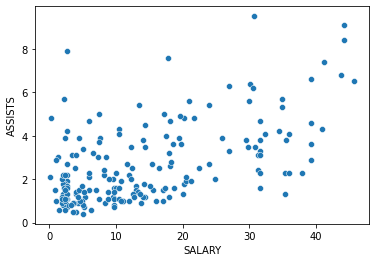

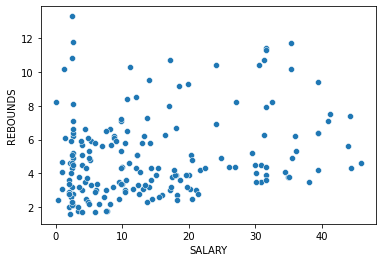

In [64]:
sns.scatterplot(data=non_rookie_dataset, x=non_rookie_dataset['SALARY']/1000000, y=non_rookie_dataset['POINTS'])
plt.show()

sns.scatterplot(data=non_rookie_dataset, x=non_rookie_dataset['SALARY']/1000000, y=non_rookie_dataset['ASSISTS'])
plt.show()

sns.scatterplot(data=non_rookie_dataset, x=non_rookie_dataset['SALARY']/1000000, y=non_rookie_dataset['REBOUNDS'])
plt.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

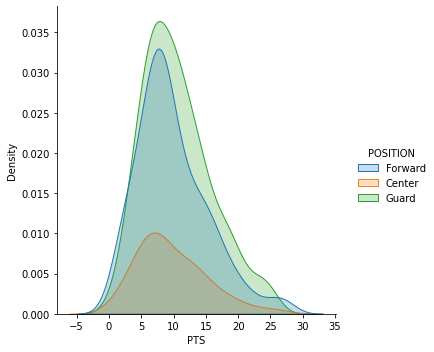

In [65]:
#Scoring average grouped by position
sns.displot(data=nba_dataset, x="PTS", hue="POSITION", kind='kde', fill=True)
plt.show()

In [66]:
scoring_guards = pd.DataFrame()
scoring_centers = pd.DataFrame()
scoring_forwards = pd.DataFrame()
count = 0
for index, columns in nba_dataset.iterrows():
  if columns["POSITION"] == "Guard":
    scoring_guards.loc[count,"PTS"] = columns["PTS"]
  elif columns["POSITION"] == "Center":
    scoring_centers.loc[count, "PTS"] = columns["PTS"]
  else:
    scoring_forwards.loc[count, "PTS"] = columns["PTS"]

  count = count + 1

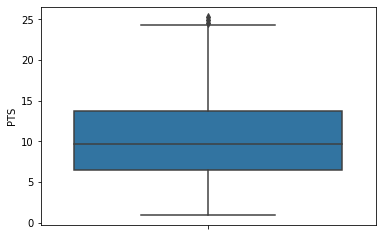

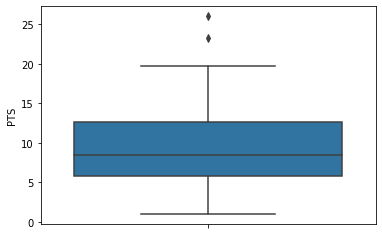

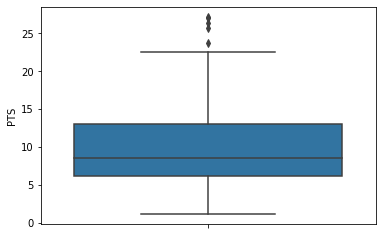

In [67]:
#Average scoring of Guards
sns.boxplot(data=scoring_guards, y='PTS')
plt.show()

#Average scoring of Centers
sns.boxplot(data=scoring_centers, y='PTS')
plt.show()

#Average scoring of Forwards
sns.boxplot(data=scoring_forwards, y='PTS')
plt.show()

6- Plot the Height distribution of all players

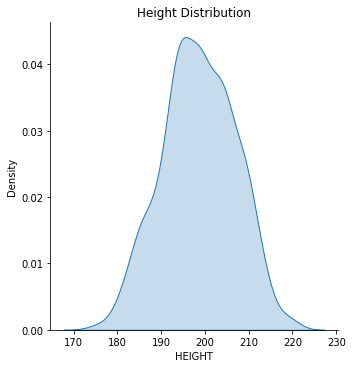

In [68]:
### Complete in this cell: height distribution
sns.displot(data=nba_dataset, x="HEIGHT", kind="kde", fill=True).set(title='Height Distribution')
plt.show()

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)